In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


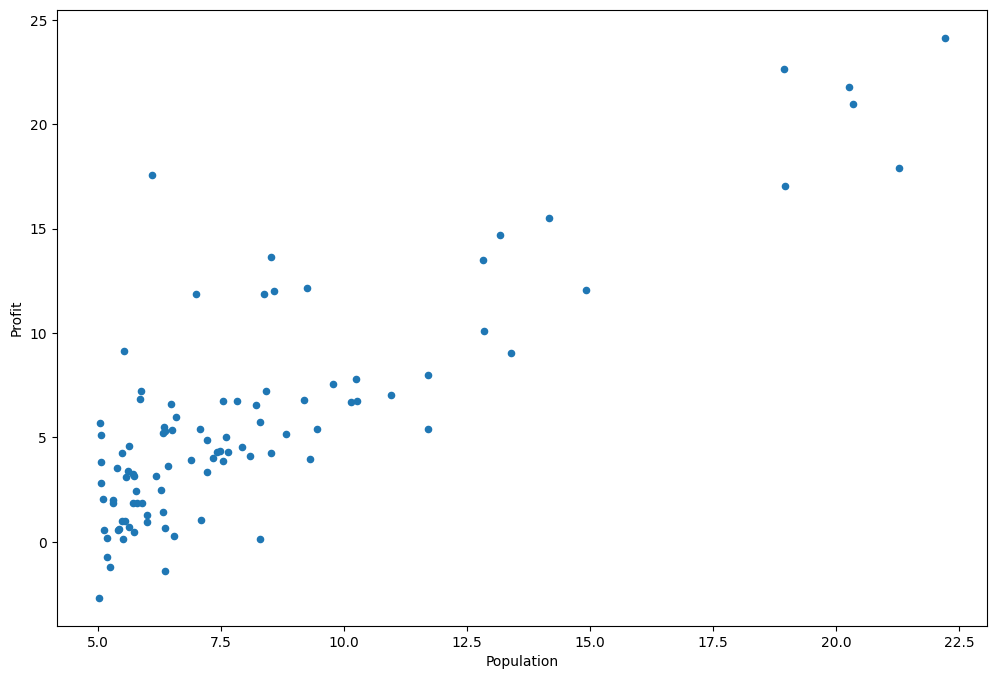

In [7]:
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12,8))
plt.show()

In [8]:
def computeCost(X,y,theta):
  inner = np.power(((X * theta.T) - y),2)
  return np.sum(inner) / (2 * len(X))

In [9]:
data.insert(0,'Ones',1)

In [10]:
cols = data.shape[1]
X = data.iloc[:,:-1]
y = data.iloc[:,cols-1:cols]

In [11]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [14]:
computeCost(X,y,theta)

32.072733877455676

In [15]:
def gradientDescent(X,y,theta,alpha,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)

  for i in range(iters):
    error = (X * theta.T) - y

    for j in range(parameters):
      term = np.multiply(error,X[:,j])
      temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))

    theta = temp
    cost[i] = computeCost(X,y,theta)

  return theta,cost

In [16]:
alpha = 0.01
iters = 1500

In [17]:
g,cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.63029144,  1.16636235]])

In [18]:
predict1 = [1,3.5] * g.T
print("predict1:",predict1)
predict2 = [1,7] * g.T
print("predict2:",predict2)

predict1: [[0.45197679]]
predict2: [[4.53424501]]


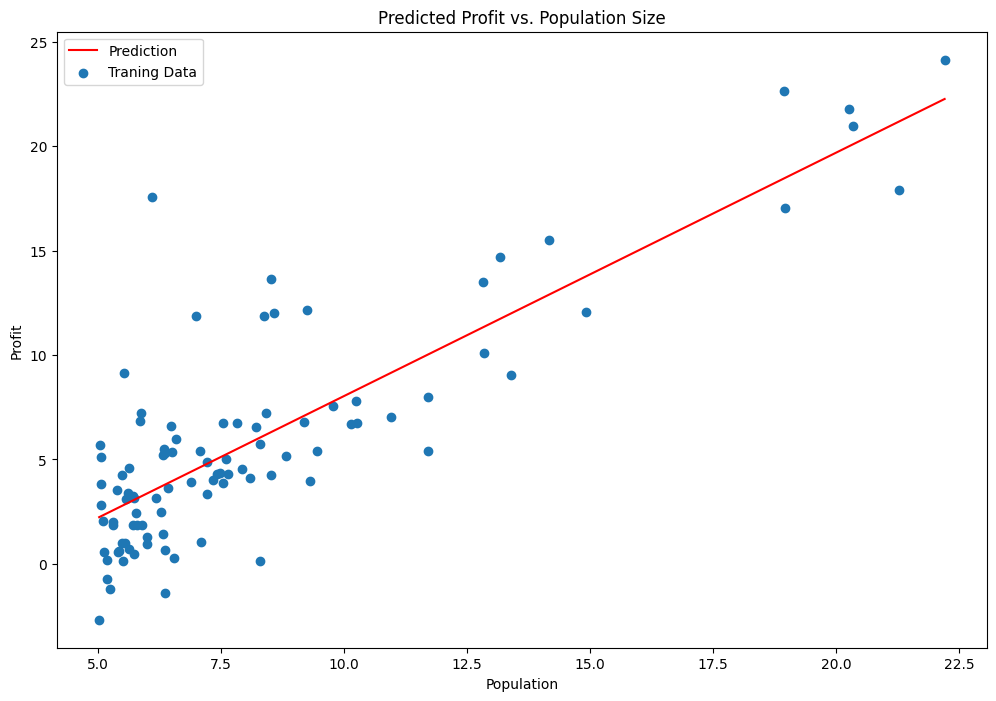

In [19]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0] + (g[0,1] * x)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()